In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy import stats
import seaborn as sns
from io import StringIO

In [5]:
df = pd.read_csv(".\\result.csv")
df

,adv_ID,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales,TV,Actor
0,1,37.8,69.2,No,218595,9503000,3978000,6409000,2210000,22.1,230.1,No
1,2,39.3,45.1,Yes,42275,4472000,1872000,3016000,1040000,10.4,44.5,Yes
2,3,45.9,69.3,No,16340,5160000,2160000,3480000,1200000,12.0,17.2,No
3,4,41.3,58.5,No,143925,7095000,2970000,4785000,1650000,16.5,151.5,No
4,5,10.8,58.4,No,171760,7697000,3222000,5191000,1790000,17.9,180.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3.7,13.8,No,35526,3268000,1368000,2204000,760000,7.6,38.2,No
196,197,4.9,8.1,No,87606,6020000,2520000,4060000,1400000,14.0,94.2,No
197,198,9.3,6.4,No,164610,6364000,2664000,4292000,1480000,14.8,177.0,No
198,199,42.0,66.2,No,263748,10965000,4590000,7395000,2550000,25.5,283.6,No


In [6]:
df = df.loc[df['Sales']<500]
df

,adv_ID,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales,TV,Actor
0,1,37.8,69.2,No,218595,9503000,3978000,6409000,2210000,22.1,230.1,No
1,2,39.3,45.1,Yes,42275,4472000,1872000,3016000,1040000,10.4,44.5,Yes
2,3,45.9,69.3,No,16340,5160000,2160000,3480000,1200000,12.0,17.2,No
3,4,41.3,58.5,No,143925,7095000,2970000,4785000,1650000,16.5,151.5,No
4,5,10.8,58.4,No,171760,7697000,3222000,5191000,1790000,17.9,180.8,No
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3.7,13.8,No,35526,3268000,1368000,2204000,760000,7.6,38.2,No
196,197,4.9,8.1,No,87606,6020000,2520000,4060000,1400000,14.0,94.2,No
197,198,9.3,6.4,No,164610,6364000,2664000,4292000,1480000,14.8,177.0,No
198,199,42.0,66.2,No,263748,10965000,4590000,7395000,2550000,25.5,283.6,No


<Axes: >

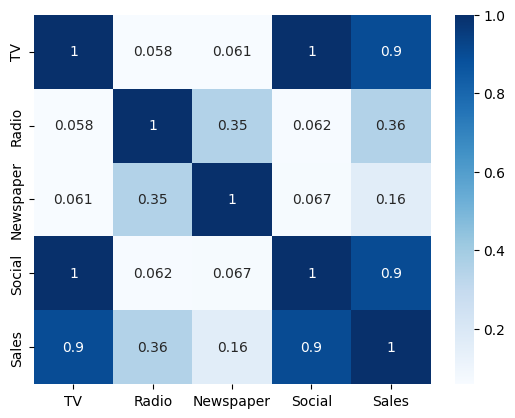

In [10]:
dati = df[['TV','Radio','Newspaper', 'Social', 'Sales']]
sns.heatmap(dati.corr(), annot=True, cmap='Blues')

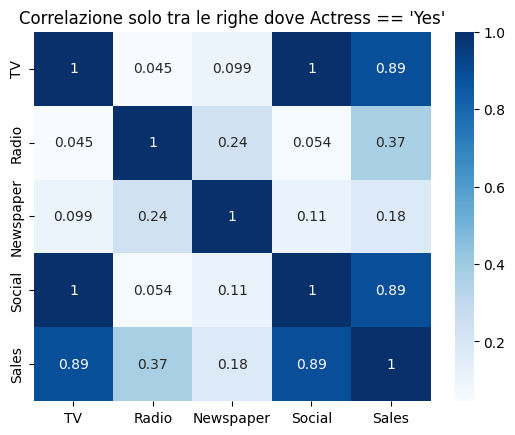

In [14]:
yesdonne = dati.loc[(df['Actress']== 'Yes')]

plt.title("Correlazione solo tra le righe dove Actress == 'Yes'")
sns.heatmap(yesdonne.corr(), annot=True, cmap='Blues')
plt.show()

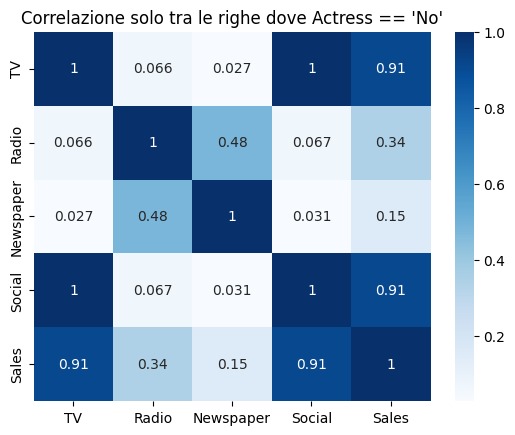

In [19]:
nodonne = dati.loc[(df['Actress']== 'No')]

plt.title("Correlazione solo tra le righe dove Actress == 'No'")
sns.heatmap(nodonne.corr(), annot=True, cmap='Blues')
plt.show()

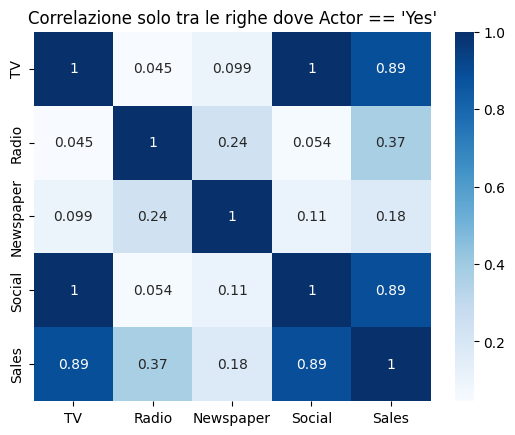

In [20]:
yesuomini = dati.loc[(df['Actor']== 'Yes')]

plt.title("Correlazione solo tra le righe dove Actor == 'Yes'")
sns.heatmap(yesuomini.corr(), annot=True, cmap='Blues')
plt.show()

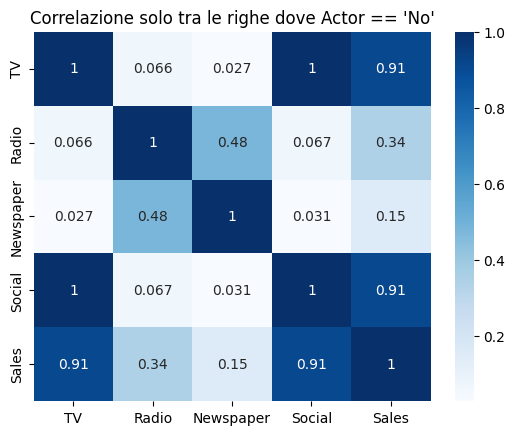

In [21]:
nouomini = dati.loc[(df['Actor']== 'No')]

plt.title("Correlazione solo tra le righe dove Actor == 'No'")
sns.heatmap(nouomini.corr(), annot=True, cmap='Blues')
plt.show()

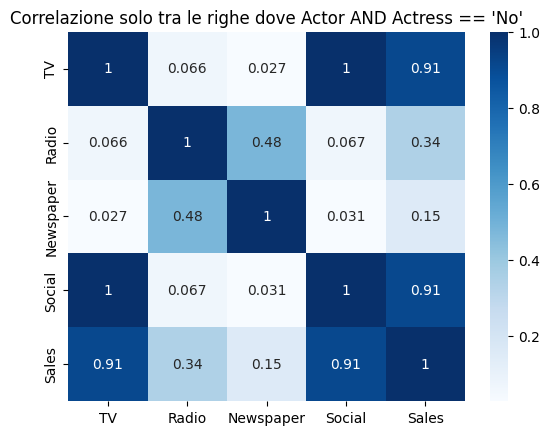

In [23]:
nopersone = dati.loc[(df['Actor']== 'No') & (df['Actress']== 'No')]

plt.title("Correlazione solo tra le righe dove Actor AND Actress == 'No'")
sns.heatmap(nopersone.corr(), annot=True, cmap='Blues')
plt.show()

In [24]:
ds = df.loc[(df['Actor']== 'No') & (df['Actress']== 'Yes')]
ds

,adv_ID,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales,TV,Actor


In [25]:
ds = df.loc[(df['Actor']== 'Yes') & (df['Actress']== 'No')]
ds

,adv_ID,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales,TV,Actor


In [26]:
ds1 = df.loc[(df['Actor']== 'Yes') & (df['Actress']== 'Yes')]
ds2 = df.loc[(df['Actor']== 'No') & (df['Actress']== 'No')]

In [27]:
ds1

,adv_ID,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales,TV,Actor
1,2,39.3,45.1,Yes,42275,4472000,1872000,3016000,1040000,10.4,44.5,Yes
7,8,19.6,11.6,Yes,114190,5676000,2376000,3828000,1320000,13.2,120.2,Yes
9,10,2.6,21.2,Yes,189810,6708000,2808000,4524000,1560000,15.6,199.8,Yes
12,13,35.1,65.9,Yes,22610,3956000,1656000,2668000,920000,9.2,23.8,Yes
15,16,47.7,52.9,Yes,185630,9632000,4032000,6496000,2240000,22.4,195.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
185,186,45.1,19.6,Yes,190650,9718000,4068000,6554000,2260000,22.6,205.0,Yes
190,191,41.1,5.8,Yes,36735,4644000,1944000,3132000,1080000,10.8,39.5,Yes
191,192,10.8,6.0,Yes,70215,5117000,2142000,3451000,1190000,11.9,75.5,Yes
192,193,4.1,31.6,Yes,15996,2537000,1062000,1711000,590000,5.9,17.2,Yes


In [28]:
ds2

,adv_ID,Radio,Newspaper,Actress,Social,tv fatturato,radio fatturato,social fatturato,paper fatturato,Sales,TV,Actor
0,1,37.8,69.2,No,218595,9503000,3978000,6409000,2210000,22.1,230.1,No
2,3,45.9,69.3,No,16340,5160000,2160000,3480000,1200000,12.0,17.2,No
3,4,41.3,58.5,No,143925,7095000,2970000,4785000,1650000,16.5,151.5,No
4,5,10.8,58.4,No,171760,7697000,3222000,5191000,1790000,17.9,180.8,No
5,6,48.9,75.0,No,8265,3096000,1296000,2088000,720000,7.2,8.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,3.7,13.8,No,35526,3268000,1368000,2204000,760000,7.6,38.2,No
196,197,4.9,8.1,No,87606,6020000,2520000,4060000,1400000,14.0,94.2,No
197,198,9.3,6.4,No,164610,6364000,2664000,4292000,1480000,14.8,177.0,No
198,199,42.0,66.2,No,263748,10965000,4590000,7395000,2550000,25.5,283.6,No
